In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('D:\\Documentos\\Estudos\\Dados\\Udemy\\Formação cientista de dados\\'
    +'FormacaoCD\\16.Prática em Python\\dados\\iris.csv')


In [3]:
#df
df.shape
#df.head()


(150, 5)

In [27]:
df.groupby(['class']).size()
# df.groupby(['sepal width']).size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
#Mudança da Semente da base importada aleatória randômica para manter os resultados em várias execuções.
np.random.seed(2345)

#150 amostras (total de linhas da base), que podem ser 0 ou 1, com reposição, probabilidade 70% de dar 0 e 30% de dar 1.
amostra = np.random.choice(a = [0, 1], size=150, replace=True, p=[0.7,0.3])

print(len(amostra))

print(len(amostra[amostra == 0]))
print(len(amostra[amostra == 1]))


150
101
49


In [12]:
base_final = df.loc[amostra == 1]
base_final.shape


(49, 5)

## Amostragem sistemática

In [2]:
from math import ceil # Servirá para pegarmos o maior valor de uma divisão, no caso um numero real

In [19]:
# Criação das variáveis para representar a população, a amostra e o valor de k
populacao = 150
amostra = 15
k = ceil(populacao / amostra)
k

10

In [33]:
#Definição do valor randômico para inicializar a amostra, iniciando em 1 até k+1
r = np.random.randint(low=1, high=k + 1, size=1)
print(r)

[9]


In [34]:
#For para somar os próximos valores, baseado no primeiro valor r que foi definido acima
acumulador = r[0]
sorteados = []

for i in range(amostra):
    
    sorteados.append(acumulador)
    acumulador += k
print(sorteados)

[np.int32(9), np.int32(19), np.int32(29), np.int32(39), np.int32(49), np.int32(59), np.int32(69), np.int32(79), np.int32(89), np.int32(99), np.int32(109), np.int32(119), np.int32(129), np.int32(139), np.int32(149)]


In [36]:
len(sorteados)

15

In [37]:
# Utilizamos a base de dados e criamos a base_final somente com valores sorteados.
base_final = df.loc[sorteados]
base_final

,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
39,5.1,3.4,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor
69,5.6,2.5,3.9,1.1,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


## Amostra estratificada

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
# Vamos pegar uma amostra por cada classe, sendo essas amostras a metade do total de cada classe, mas isso de forma aleatória
# e não por exeplo as 25 primeiras ou últimas. 

# df.iloc[:, 0:4]: buscamos somente os atributos previsores, ou seja, os dados sobre pétala e sétala da planta
# df.iloc[:, 4]: buscamos somente a classe, que é a espécie da planta(setosa, virginica ou versicolar)
# test_size: selecionamos 50% da base de dados, que serão copiados para as variáveis x e y. Essa função retorna 4 valores.
# porém, vamos usar somente os 50% da base de dados e por isso colocamos "_" para os outros valores.
# stratify: para retornar a amostra baseada na classe
x, _, y, _ = train_test_split(df.iloc[:, 0:4], df.iloc[:, 4], 
                           test_size=0.5, stratify=df.iloc[:,4])

y.value_counts()

class
Iris-versicolor    25
Iris-setosa        25
Iris-virginica     25
Name: count, dtype: int64

In [13]:
# Base de dados de um estudo sobre infertilidade
infert_df = pd.read_csv('D:\\Documentos\\Estudos\\Dados\\Udemy\\Formação cientista de dados\\'
    +'FormacaoCD\\16.Prática em Python\\dados\\infert.csv')

In [14]:
infert_df

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


In [15]:
# Filtrando pela coluna de tempo do estudo
infert_df['education'].value_counts()

education
6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: count, dtype: int64

In [26]:
# Criando uma amostra com somente 40% dos registros (por isso é definido 0.6, pois é gerado o inverso)
x1, _, y1, _ = train_test_split(infert_df.iloc[:, 2:9], infert_df.iloc[:, 1],
                                test_size=0.6, stratify=infert_df.iloc[:, 1])

y1.value_counts()

education
6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: count, dtype: int64

## Medidas de centralidade e variabilidade

In [2]:
import numpy as np
from scipy import stats

In [3]:
# Criação da variável com dados dos jogadores, visualização da média e mediana.
jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]
np.mean(jogadores)

np.float64(181111.11111111112)

In [4]:
np.median(jogadores)

np.float64(40000.0)

In [5]:
# Criação da variável para geração dos quartis (0%, 25%, 50%, 75%, 100%)
quartis = np.quantile(jogadores, [0, 0.25, 0.5, 0.75, 1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [6]:
# visualização do desvio padrão, com grau de liberdade = 1
np.std(jogadores, ddof=1)

np.float64(255307.87514511007)

In [7]:
# Visualização de estatíscas mais detalhadas usando scipy (Numero de valores, min e max
# média, variância,  assimetria e kurtosis)
stats.describe(jogadores)

DescribeResult(nobs=9, minmax=(np.int64(12000), np.int64(800000)), mean=np.float64(181111.11111111112), variance=np.float64(65182111111.11111), skewness=np.float64(1.758635899846188), kurtosis=np.float64(1.9572075427527729))

### Distribuição normal

In [8]:
from scipy.stats import norm

In [ ]:
# Conjunto de objetos em uma cesta, a média é 8 e o desvio padrão é 2

In [9]:
# Qual a probabilidade de tirar um objeto que peso é menor que 6 quilos?
norm.cdf(6,8,2) # cdf é quando a probabilidade é "menor que" ou a "esquerda" da média.

np.float64(0.15865525393145707)

In [11]:
# Qual a probabilidade de tirar um objeto que o peso é maior que 6 quilos ?
norm.sf(6,8,2) # sf é quando a probabilidade é "maior que" ou a "direita" da média.
# ou
1 - norm.cdf(6,8,2) # Podemos chegar ao mesmo resultado do sf, subtraindo 1 da probabilidade a esquerda.


np.float64(0.8413447460685429)

In [14]:
# Qual a probabilidade de tirar um objeto que o peso é menor que 6 ou maior que 10 quilos?
# Apenas tiramos as duas probabilidaes isoladamente e depois somamos os resultados.
# Lembrando que cdf "medor" e sf "maior".
norm.cdf(6,8,2) + norm.sf(10,8,2)

np.float64(0.31731050786291415)

In [17]:
# Qual a probabilidade de tirar um objeto que o peso é menor que 10 e maior que 8 quilos?
norm.cdf(10, 8, 2) - norm.sf(8, 8, 2)
#norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2)

np.float64(0.3413447460685429)

## Como descobrir se os dados se aproximam de uma distribuição normal
### Teste de distribuição normal

In [19]:
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt

In [23]:
# Criação de uma variável com dados em uma distribuição normal com a função rvs (1000 elementos)
dados = norm.rvs(size = 1000)
#dados

Text(0.5, 1.0, 'Dados')

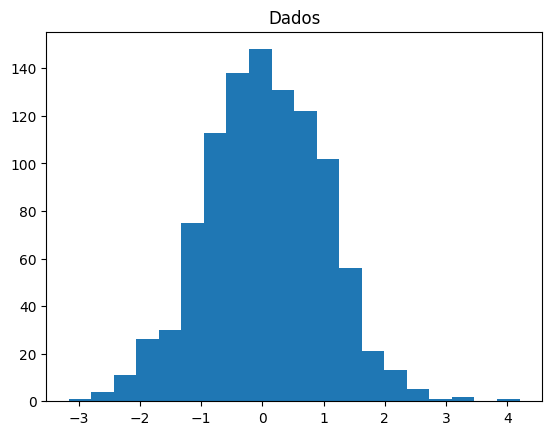

In [24]:
#histograma
# O bins é a quantidaded e barras que deseja.
plt.hist(dados, bins=20)
plt.title("Dados")

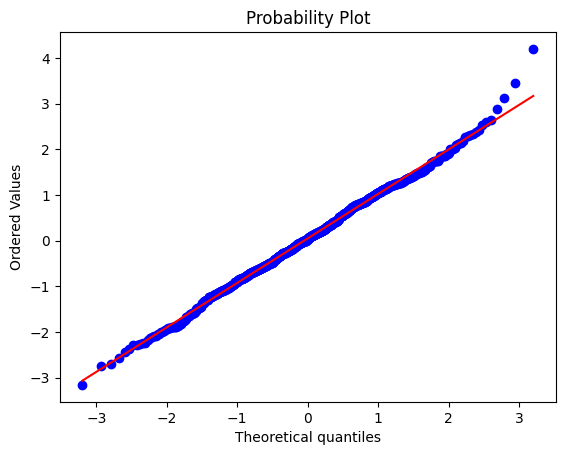

In [ ]:
# geração de gráfico para verificar se a distribuição é normal
# Ele faz uma comparação dos nossos dados com a linha de uma distribuição normal para ver se nossos dados
#são ou se aproximam de uma distribuição normal.
# É normal ter um pouco de dissonância nas bordas.

fig, ax = plt.subplots()
stats.probplot(dados, fit=True, plot=ax)
plt.show()

In [27]:
# Execução do teste de shapiro
# Segundo argumento é o valor de p, não há como rejeitar a hipótese nula
# 
stats.shapiro(dados)

ShapiroResult(statistic=np.float64(0.9974753999486727), pvalue=np.float64(0.12468438503780765))

##### Dados não normais

In [28]:
# Skewnorm serve para geraão de dados enviesados
dados2 = skewnorm.rvs(4, size=1000)

Text(0.5, 1.0, 'Dados2')

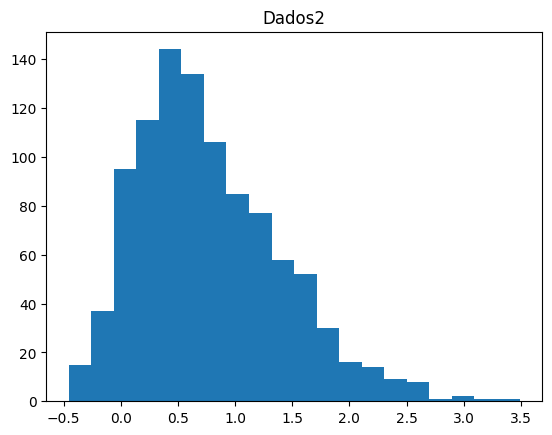

In [29]:
#histograma
plt.hist(dados2, bins= 20)
plt.title("Dados2")

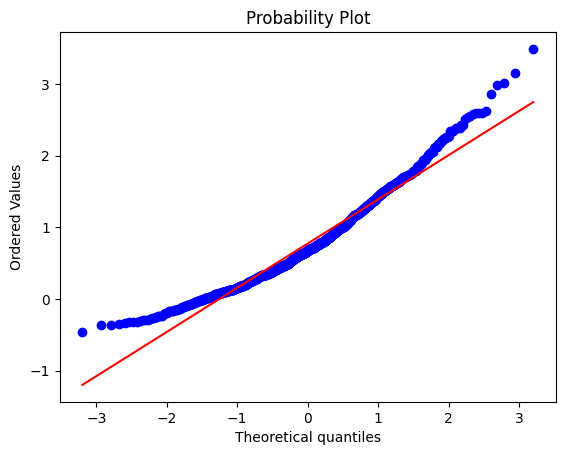

In [31]:
#Geração de gráfico para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(dados2, fit=True, plot=ax)
plt.show()

In [32]:
stats.shapiro(dados2)

ShapiroResult(statistic=np.float64(0.9603119488148975), pvalue=np.float64(7.660122977833397e-16))